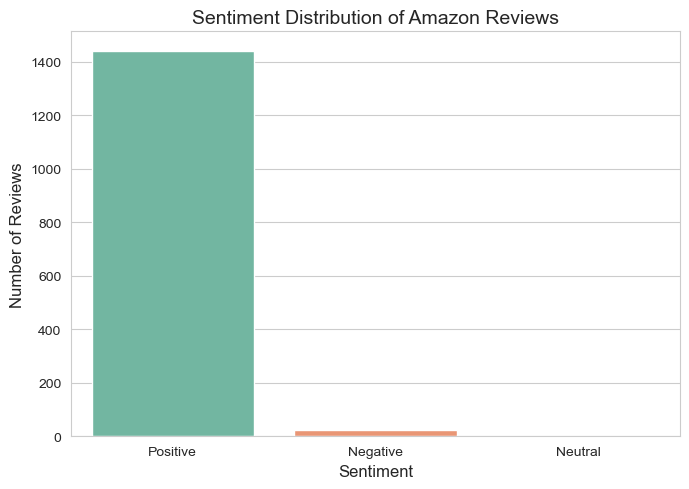

Total Reviews: 1465
Most Common Sentiment: Positive
Average Polarity Score: 0.271

Sample Reviews with Sentiment:



product_name  \
1325              Aquaguard Aura RO+UV+UF+Taste Adjuster(MTDS) with Active Copper & Zinc 7L water purifier8 stages of purificationsuitable for borewelltankermunicipal water(Black) from Eureka Forbes   
421   boAt Wave Call Smart Watch Smart Talk with Advanced Dedicated Bluetooth Calling Chip 1.69” HD Display with 550 NITS & 70% Color Gamut 150+ Watch Faces Multi-Sport Modes HR SpO2 IP68(Deep Blue)   
340                                                                                                                                             OnePlus Nord 2T 5G (Gray Shadow 8GB RAM 128GB Storage)   
743                                                                            Amazon Basics Magic Slate 8.5-inch LCD Writing Tablet with Stylus Pen for Drawing Playing Noting by Kids & Adults Black   
1135       InstaCuppa Portable Blender for Smoothie Milk Shakes Crushing Ice and Juices USB Rechargeable Personal Blender Machine for Kitchen with 2000 mAh Rechargeable Battery 150 Watt Motor 400 ML   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [12]:
# 📌 Step 1: Import Libraries
import pandas as pd
import re
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# 🧼 Optional: Styling
pd.set_option('display.max_colwidth', None)
sns.set_style("whitegrid")

# 📥 Step 2: Load Dataset
df = pd.read_csv("amazon.csv")  # Replace with your actual file name
df = df[["product_name", "review_content"]].dropna().reset_index(drop=True)

# 🧼 Step 3: Clean the Review Text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)             # remove links
    text = re.sub(r"[^a-z\s]", "", text)            # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()        # remove extra spaces
    return text

df["cleaned_review"] = df["review_content"].apply(clean_text)

# 💬 Step 4: Sentiment Scoring using TextBlob
df["polarity"] = df["cleaned_review"].apply(lambda x: TextBlob(x).sentiment.polarity)

# 🟢🔴 Step 5: Sentiment Labeling
def get_sentiment(p):
    if p > 0:
        return "Positive"
    elif p < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["polarity"].apply(get_sentiment)

# 📊 Step 6: Visualization (cleaned version)
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="sentiment", hue="sentiment", legend=False, palette="Set2")
plt.title("Sentiment Distribution of Amazon Reviews", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 📌 Step 7: Summary Insights
print("Total Reviews:", len(df))
print("Most Common Sentiment:", df["sentiment"].mode()[0])
print("Average Polarity Score:", round(df["polarity"].mean(), 3))

# 🗃️ Step 8: Show Sample Results
print("\nSample Reviews with Sentiment:\n")
display(df[["product_name", "review_content", "sentiment"]].sample(5))
